# 1번 프로젝트
  - 코딩의 효율성에 초점을 맞춰서 코딩해 봄
      + 반복되는 실행 : 함수를 만들어 호출하여 코드 작성
        + def image_desizing(choice, width, length): # 이미지 크기 조정 함수
        + def load_data(img_path, num): # train, test data에 label 부여 함수
      + load_data 함수 내에 비슷한 반복문 존재
        + list를 작성하여 반복문 코드를 단순하게 작성
          
          
        
## 슬랙에 올라온 자료를 합쳐 3600개 데이터 확보
  - train data와 test data를 random함수를 통해 인덱스를 확보
    - test data 인덱스를 확보
    - 확보한 인덱스로 test data를 구성
    - 나머지 인덱스는 train data로 만듬
      
      
  - test data를 300여개 확보하고자 하였지만 중복되는 숫자도 발생
    - set 형으로 정의하여 중복되는 숫자는 처리
    - test data 개수가 300개가 안됨
      
        
        
## 결과 분석
  - 정확도가 너무 높음
  - 슬랙에 올라온 자료는 모두 비슷한 형태로 사진을 찍어서 정확도가 높은 것으로 추정됨
 

In [1]:
# !pip install pillow

from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료")

PIL 라이브러리 import 완료


## 코딩의 효율성
  - 이미지 크기 조정 작업을 세 번 반복
    + 함수로 만들어 호출하면 코딩이 줄어듬
  - 함수의 인자
    + choice : scissor, rock, paper
    + width : 이미지 폭
    + length : 이미지 높이
      + 이미지 크기 조절을 원하면 함수를 호출할 때 인자를 수정하면 가능


In [2]:
def image_desizing(choice, width, length):

    image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/" + choice

    images = glob.glob(image_dir_path + "/*.jpg")

    #파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.

    target_size = (width, length)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(choice + " 이미지 resize 완료!")
    
image_desizing("scissor", 28, 28)
image_desizing("rock", 28, 28)
image_desizing("paper", 28, 28)

scissor 이미지 resize 완료!
rock 이미지 resize 완료!
paper 이미지 resize 완료!


In [3]:
os.walk("~/aiffel/rock_scissor_paper/rock")

<generator object walk at 0x7f6a7c7701d0>

## 코딩의 효율성
  - 함수를 통해 train data와 test data를 호출함으로 코드 단순화
    + 함수 인자는 경로와 파일 수
    + 우분투에서 디렉토리 내에 파일 수를 셀 수 있는 방법을 모름
      + 검색을 통해 코딩했지만 오류 발생 -> 후에 파악하면 수정할 예정
      + 방법을 알게되면 파일 수(3600개)를 몰라도 실행 가능
  - label을 부여하기 위해 for 문을 유사하게 3번 반복
    + 경로를 지정하는 것을 리스트로 작성하여 코드 단순화
    + 분류항목이 늘어나면 리스트만 조정하면 가능(확장성)

---
    # 디렉토리 별 label 부여, 리스트로 작성하여 반복되는 구문을 단순화함
    srps = ["/scissor/*.jpg", "/rock/*.jpg", "/paper/*.jpg"]
    
    idx = 0
    label = 0
    
    for srp in srps:
        for file in glob.iglob(img_path + srp):
            img = np.array(Image.open(file),dtype=np.int32)
            
            imgs[idx,:,:,:] = img
            labels[idx] = label
            
            idx += 1
            
        label += 1

---


In [4]:
import numpy as np
import random

def load_data(img_path, num):
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3

    # train data / test data를 구분하기 위해 난수 발생
    # test data 300개 할당 --> 중복된 수가 발생되어 실제 300개가 안됨.

    test_idxs = {random.randrange(3600) for n in range(300)}

    #    test_idxs.sort()    # set형이라 정렬할 필요없음
#    train_idxs = [n for n in range(num) if n not in test_idxs]  # 리스트 형일 때 사용했음.
   
    test_num = len(test_idxs)
    
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(num*img_size*img_size*color,dtype=np.int32).reshape(num,img_size,img_size,color)
    labels=np.zeros(num,dtype=np.int32)
    
    train_imgs=np.zeros((num-test_num)*img_size*img_size*color,dtype=np.int32).reshape(num-test_num,img_size,img_size,color)
    train_labels=np.zeros(num-test_num,dtype=np.int32)
    
    test_imgs=np.zeros(test_num*img_size*img_size*color,dtype=np.int32).reshape(test_num,img_size,img_size,color)
    test_labels=np.zeros(test_num,dtype=np.int32)
    
    
    # 디렉토리 별 label 부여, 리스트로 작성하여 반복되는 구문을 단순화함
    srps = ["/scissor/*.jpg", "/rock/*.jpg", "/paper/*.jpg"]
    
    idx = 0
    label = 0
    
    for srp in srps:
        for file in glob.iglob(img_path + srp):
            img = np.array(Image.open(file),dtype=np.int32)
            
            imgs[idx,:,:,:] = img
            labels[idx] = label
            
            idx += 1
            
        label += 1

# train data와 test data를 랜덤 발생시킨 인덱스를 통해서 할당해줌
    train_i, test_i = 0, 0   # 튜블
    for i in range(3600):
        if i not in test_idxs:
            train_imgs[train_i,:,:,:] = imgs[i,:,:,:]
            train_labels[train_i] = labels[i]
            train_i += 1
        else:
            test_imgs[test_i:,:,:] = imgs[i,::,:]
            test_labels[test_i] = labels[i]
            test_i += 1
            
    return train_imgs, train_labels, test_imgs, test_labels

# 데이터 경로
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"

# train data와 test data label 부여하고 위한 함수 호출
(x_train, y_train, x_test, y_test) = load_data(image_dir_path, 3600)

x_train_norm, x_test_norm = x_train/255.0, x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print()

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

x_train shape: (3314, 28, 28, 3)
y_train shape: (3314,)

x_test shape: (286, 28, 28, 3)
y_test shape: (286,)


라벨:  1


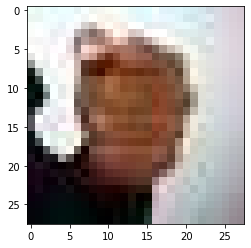

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_test[150])
print('라벨: ', y_test[150])

In [6]:
# random으로 만들어진 인덱스에 의한 train, test data의 label 분포 확인

import collections

print(collections.Counter(y_train), collections.Counter(y_test))

Counter({2: 1118, 1: 1106, 0: 1090}) Counter({0: 110, 1: 94, 2: 82})


In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9

In [8]:
#바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=64
n_channel_2=32
n_dense=16
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                12816     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

In [9]:
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))


test_loss: 0.24174213409423828 
test_accuracy: 0.9160839319229126


### test한 식

In [10]:
import random

#random.randint(0, 1200)

idx = [random.randrange(100) for i in range(20)]
idx.sort()

#for i in range(100)     
not_idx = [i for i in range(100) if i not in idx]

In [11]:
print(idx)
print()
print(not_idx)

[2, 5, 6, 8, 11, 19, 26, 29, 40, 40, 44, 49, 50, 51, 58, 65, 74, 76, 84, 98]

[0, 1, 3, 4, 7, 9, 10, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 45, 46, 47, 48, 52, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 75, 77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99]
